# Принятие решений в бизнесе

Отдел маркетинга интернет-магазина подготовил список гипотез для увеличения выручки. 

Задача исследования: 

 - Изучить предоставленные данные;
 - Приоритизировать гипотезы из предоставленного списка;
 - Осуществить и провести анализ результатов А/В-тестирования, а также принять решение по результатам теста (Остановить тест, зафиксировать победу одной из групп; остановить тест, зафиксировать отсутствие различий между группами; Продолжить тест)



### Приоритизация гипотез

**Обзор и предобработка данных**

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
import pathlib
import scipy.stats as stats

from pathlib import Path


In [2]:
#Задаем размер графиков
sns.set(rc={'figure.figsize':(10,6)})

#Устанавливаем ограничения на количество знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

#Снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

#Снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [3]:
#Чтение файлов
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
#Вывод информации о таблице hypothesis
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#Вывод информации о таблице orders
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
#Вывод информации о таблице orders
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
#Проверка на наличие пропусков
display(hypothesis.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [8]:
#Проверка на наличие дубликатов
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

**Вывод**

После ознакомления с датафреймами, можно заметить, что в наименование столбцов написано в разных регистрах. В датафреймах отсутствуют пропуски, но тип данных столбцов с датами object. Дубликаты в датафреймах также отсутствуют

In [9]:
#Приведение названия столбцов к "змеиному" регистру
orders.columns = [name.replace('Id', '_id') for name in orders.columns]
orders.columns = orders.columns.str.lower()
hypothesis.columns = hypothesis.columns.str.lower()

#Вывод наименования столбцов после замены
display(hypothesis.columns)
display(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [10]:
#Изменение типов данных столбцов с датами
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])


**Вывод**

На этапе предобработки привели наименование столбцов к змеиному регистру, а также поменяли тип данных столбцов с датами на необходимые для анализа

**Приоритизация гипотез**

Таблица hypothesis содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Для определения приоритизации гипотез, необходимо применить методы ICE и RICE, а также проанализировать их изменения

**ICE**

In [11]:
#Рассчет ICE
hypothesis['ice'] = hypothesis ['impact'] * hypothesis ['confidence']/hypothesis['efforts']

#Вывод таблицы hypothesis с результатами ICE
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все очень здорово и график также добавлен </div>

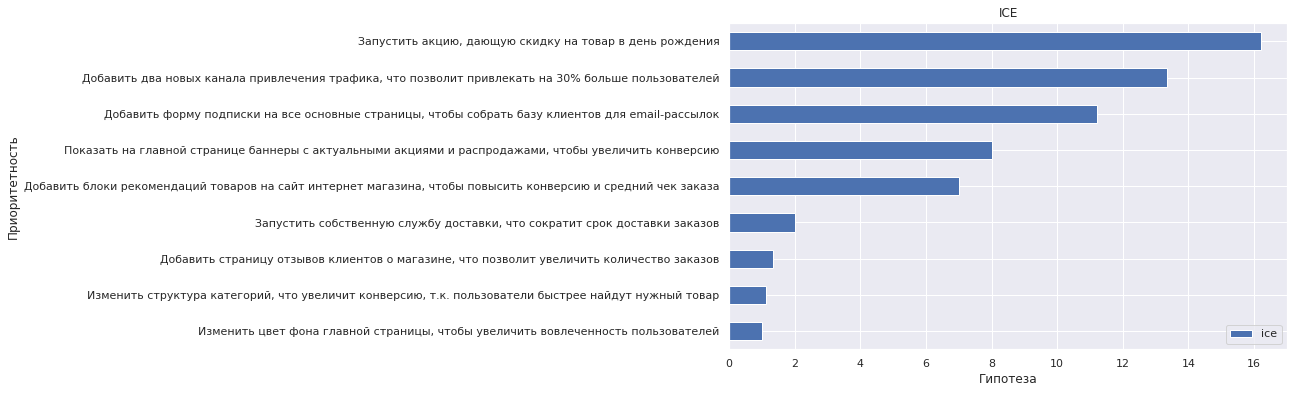

In [12]:
#Создание графика
fig, ax = plt.subplots()
hypothesis[['hypothesis', 'ice']].set_index('hypothesis').sort_values(by='ice', ascending=True).plot(kind='barh', ax=ax)

ax.set_title('ICE')
ax.set_xlabel('Гипотеза')
ax.set_ylabel('Приоритетность')
plt.show()

**Вывод**

После применения метода ICE самыми перспективными гипотезами являются гипотезы с номерами 8, 0 и 7. Далее следуют гипотезы 6 и 2 соответственно

Таким образом самым приоритетным вариантом привлечения клиентов метод ICE определил - Запуск акций, дающую скидку на товар в день рождения

**RICE**

In [13]:
#Рассчет RICE
hypothesis['rice'] = hypothesis ['reach'] * hypothesis ['impact'] * hypothesis ['confidence']/hypothesis['efforts']

#Вывод таблицы hypothesis с результатами ICE
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.000


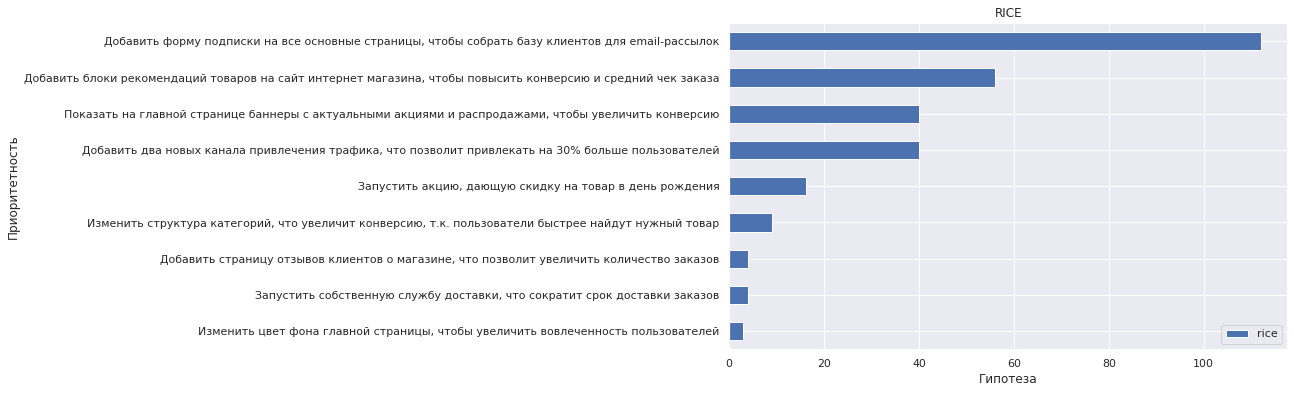

In [14]:
#Создание графика
fig, ax = plt.subplots()
hypothesis[['hypothesis', 'rice']].set_index('hypothesis').sort_values(by='rice', ascending=True).plot(kind='barh', ax=ax)

ax.set_title('RICE')
ax.set_xlabel('Гипотеза')
ax.set_ylabel('Приоритетность')
plt.show()

**Вывод**

После применения метода RICE самыми перспективными гипотезами являются гипотезы с номерами 7, 2 и 0. Далее следуют гипотезы 6 и 8 соответственно. 

После расчета и сравнения RICE и ICE, можно заметить, что топ 5 гипотез по приоритетности при применении обоих методов совпадает, но гипотезы в обоих случаях распределяются по-разному. У метода ICE самая приоритетная гипотеза 8 - Запустить акцию, дающую скидку на товар в день рождения, у RICE гипотеза 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Данную разницу можно объяснить тем, что при расчете RICE учитывается показатель reach, т.е. скольких пользователей затронет изменение. У гипотезы 7 данный показатель равен 10, а у гипотезы 8 он всего лишь 1.  


### Анализ A/B-теста

Для дальнейшего анализа необходимо запустить A/B-тест

**Кумулятивные метрики**

Для постройки графиков кумулятивных метрик, нужно собрать кумулятивные данные в один датафрейм. Для этого необходимо создать массив уникальных пар значений дат и групп теста, собрать агрегированные кумулятивные по дням данные о заказах и посетителях

In [15]:
#Cоздаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [16]:
#Собераем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = (dates_groups.apply(
                     lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
                     ].agg (
                     {'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}
                     ),axis=1).sort_values(by=['date','group']))

#Вывод результата
orders_aggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [17]:
#Собераем агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = (dates_groups.apply(
                     lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
                     ].agg (
                     {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
                     ),axis=1).sort_values(by=['date','group']))

#Вывод результата
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [18]:
#Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [19]:
#Расчет конверсии
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

#Вывод результата
cumulative_data

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.034
58,2019-08-30,A,545,493,4022970,18037,0.030
59,2019-08-30,B,620,567,5774631,18198,0.034
60,2019-08-31,A,557,503,4084803,18736,0.030


In [20]:
#Проверяем сколько пользователей попали в обе группы
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

После проверки покупателей на попадание в обе группы, выявлено 58 таких пользователей. Так как таблица по визитам агрегированная, нельзя избавиться от их визитов и с учетом того что данных пользователей не так много, поэтому оставляем их для продолжения теста

**Выручка**

Постройка графика кумулятивной выручки по группам

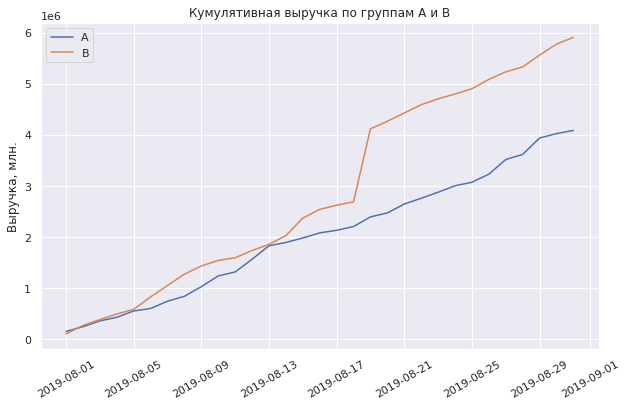

In [21]:
#Кумулятивные данные о заказах и выручке по дням в гуппе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

#Кумулятивные данные о заказах и выручке по дням в гуппе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

#Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

#Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('Кумулятивная выручка по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод**

По графику выручки можно заметить, что данный показатель растет по обеим группам. По группе А выручка растет равномерно, а по группе B после 17 августа наблюдается резкий скачек, что может свидетельствовать либо о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке

**Средний чек**

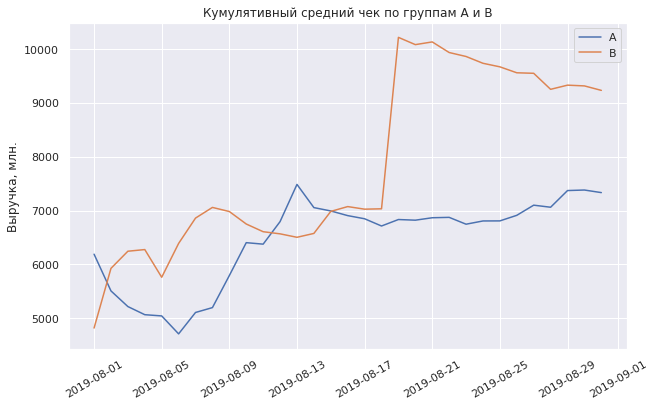

In [22]:
# Строим график кумулятивного среднего чека
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('Кумулятивный средний чек по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод**

Средний чек группы A стабилизируется к середине исследуемого периода, в то время как средний чек группы B взлетает вверх после 17 августа, после чего начинает снижаться. Можно предположит, что это связанно с очень дорогой покупкой

**Относительное изменение кумулятивного среднего чека**

В связи с попаданием в группу B аномально большого заказа, для получения реального среднего чека, необходимо построить график относительного изменения кумулятивного среднего чека группы B к группе A

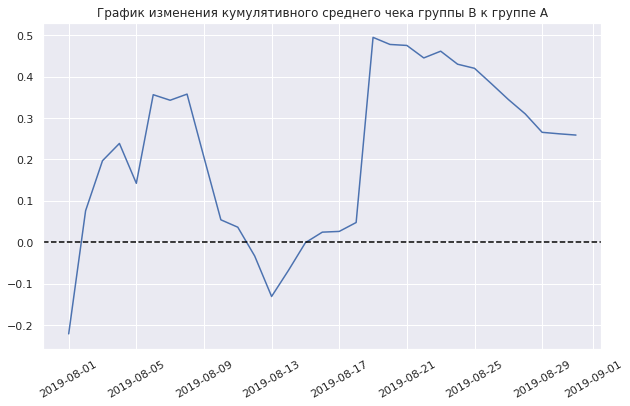

In [23]:
#Собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
                            cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (
         merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

#Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()

**Вывод**

График очень нестабилен, что говорит о наличии аномальных заказов

**Кумулятивная конверсия**

Построим график кумулятивной конверсии для продолжения анализа по группам

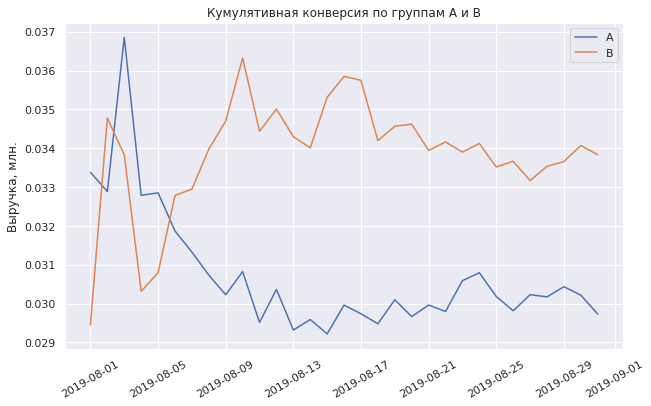

In [24]:
#Выбираме данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

#Выбираме данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

#Строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод**

В начале очень сильные колебания конверсии, но затем конверсия выравнивается. По обеим группам видны схожие колебания, но конверсия группы B более предпочтительная, хотя в самом начале группа A показывала лучший результат в абсолютных цифрах

**Относительное изменение кумулятивного среднего количества заказов** 

Построим график относительного различия кумулятивных конверсий


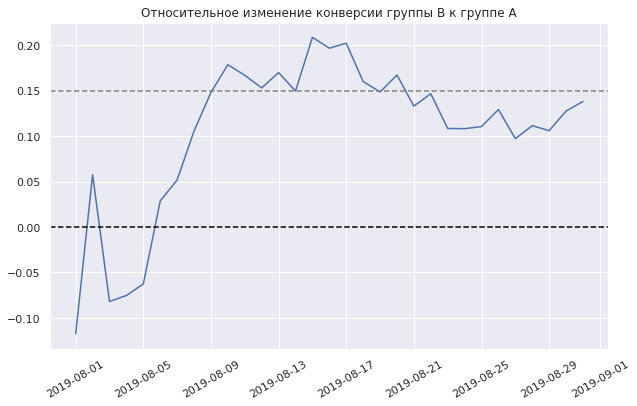

In [25]:
merged_cumulative_сonversions = (
                                cumulative_data_a[['date','conversion']].merge(
                                cumulative_data_b[['date','conversion']], 
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

plt.plot(merged_cumulative_сonversions['date'], 
         merged_cumulative_сonversions['conversionB']/merged_cumulative_сonversions['conversionA']-1)


#Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение конверсии группы B к группе A')
plt.xticks(rotation=30)
plt.show()


**Вывод**

В самом начале, несмотря на резкий взлет, показатели конверсии группы B были хуже, чем у группы А, но достаточно быстро они пошли вверх, по итогу обойдя группу A на 15%, на пике доходя до 20%. 

По предыдущим графикам, видно, что в группе B возможны аномальные значения, такие как очень дорогие покупки и большое количество заказов, которые влияют на рассматриваемые метрики. Данные необходимо проанализировать после избавления от выбросов на одного пользователя, для этого нужно проанализировать количество заказов по пользователям и стоимость заказа


**Количество заказов по пользователям**

count   1,031.000
mean        1.161
std         0.725
min         1.000
25%         1.000
50%         1.000
75%         1.000
max        11.000
Name: orders, dtype: float64

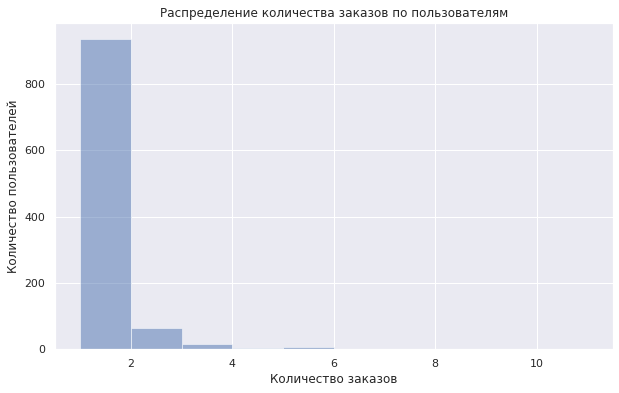

In [26]:
#Группировка заказов по пользователям 
orders_by_users = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))

#Переименование столбцов
orders_by_users.columns = ['visitor_id', 'orders']

#Вывод числового описания данных
display(orders_by_users['orders'].describe())

#Строим гистограмму
plt.hist(orders_by_users['orders'], alpha=0.5) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()


**Вывод**

По данным видно, что среднее и медианное количество заказов совпадает, большинство пользователей совершает 1 заказ, но есть пользователи, которые оформили 11 заказов

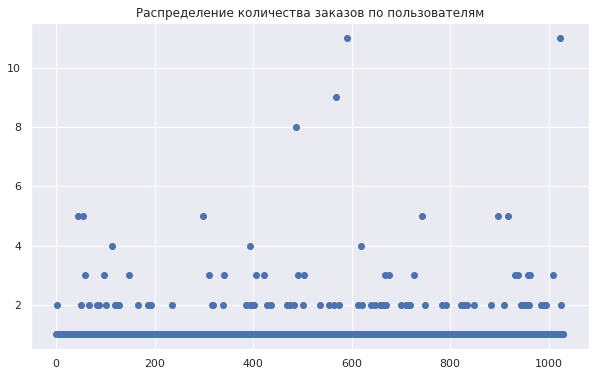

In [27]:
#Строим точечную диаграмму
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.show()

**Вывод**

Графики подтверждают, что большинство пользователей делает 1 заказ. На точечной диаграмме хорошо видны выбросы пользователей, совершивших большое количество заказов, но нельзя с уверенностью сказать являются ли аномальными значениями пользователи, совершившие 2 покупки. Для определения этого, необходимо посчитать 95-й и 99-й перцентили количества заказов на одного пользователя и выбрать границу аномальных значений

In [28]:
#Расчет перцентилей
np.percentile(orders_by_users['orders'], [ 95, 99])

array([2., 4.])

**Вывод**

Не более 5 процентов пользователей совершили более 2-х заказов и не более 1 процента пользователей сделали более 4 покупок. За границу аномального количества заказов на одного пользователя примем 4 покупки

**Стоимость заказа**

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

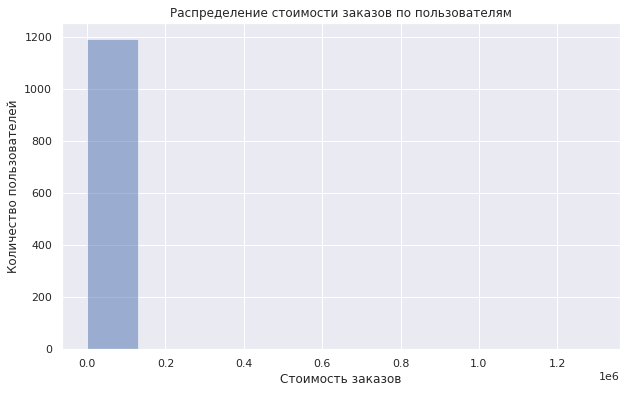

In [29]:
#Вывод числового описания данных
display(orders['revenue'].describe())

#Строим гистограмму
plt.hist(orders['revenue'], alpha=0.5) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод**

Средняя стоимость заказа выше медианного значения почти в 4 раза, что говорит о наличии значительных выбросов. Максимальная стоимость заказа почти 1,3 млн., при том что медианное значение всего 3 тыс.

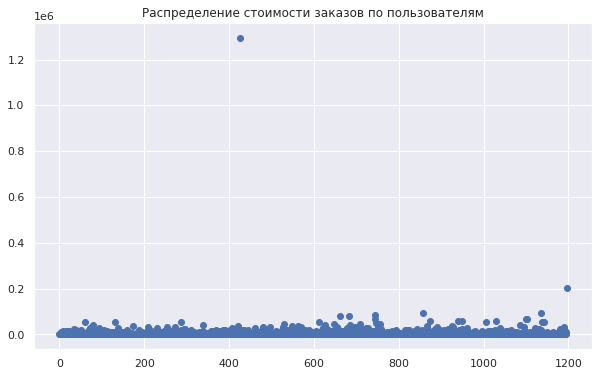

In [30]:
#Строим точечную диаграмму
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

**Вывод**

На точечной диаграмме хорошо виден отмеченный ранее выброс в 1,3 млн., который влияет на показатели метрик. Также имеются ещё менее значительные выбросы. Для более точного определения границ аномальных значений, рассчитаем 95-й и 99-й перцентили стоимости заказов на одного пользователя

In [31]:
#Расчет перцентилей
np.percentile(orders['revenue'], [ 95, 99])

array([28000. , 58233.2])

За границу аномальных значений стоимости заказа берем 99 перцентиль, т.е. 58233

**Анализ статистической значимости в среднем количестве заказов**

После расчета кумулятивных метрик и анализа графиков, в данных обнаружены выбросы и определены границы аномальных значений. Для дальнейшего анализа необходимо рассчитать статистическую значимость различий в среднем количестве заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:

Нулевая гипотеза - различий в среднем количестве заказов между группами нет

Альтернативная гипотеза - различия в среднем количестве заказов между группами есть

Уровень значимости - 0.05

Так как в данных имеются значитальные выбросы для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни


In [32]:
#Подготовка данных
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)

visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)

visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a',]

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b',]

data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

#Вывод полученной таблицы
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов 

In [33]:
#Создание переменных
orders_by_users_a = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_by_users_b.columns = ['visitor_id', 'orders']

Создадим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули

In [34]:
sample_a = pd.concat(
           [orders_by_users_a['orders'],pd.Series(
           0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat(
           [orders_by_users_b['orders'],pd.Series(
           0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)


Рассчитаем статистическую значимость различия среднего количества заказов, применив тест Манна-Уитни 

In [35]:
#Расчет статистической значимости
print('P-value:',"{0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительный прирост В к А:',"{0:.3f}".format((data['orders_per_date_b'].sum()/data['visitors_per_date_b'].sum())/(data['orders_per_date_a'].sum()/data['visitors_per_date_a'].sum())-1))

P-value: 0.01679
Относительный прирост В к А: 0.138


**Вывод**

P-value = 0.017, что меньше 0.05. Таким образом, отвергаем нулевую гипотезу, между группами есть разница. Конверсия группы B выше на 13.8% чем у группы A

**Анализ статистической значимости в среднем чеке заказа**

Рассчитаем статистическую значимость различий в среднем чеке заказа на пользователя между группами по «сырым» данным

Нулевая гипотеза - различий в среднем чеке заказа между группами нет

Альтернативная гипотеза - различия в среднем чеке заказа между группами есть

Уровень значимости - 0.05

Для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни

In [36]:
#Расчет статистической значимости
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Относительный прирост В к А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительный прирост В к А: 0.259


P-value 0.729 больше 0.05, значит причин отвергать нулевую гипотезу нет, т.е. различий в среднем чеке заказа между группами нет. Но стоит отметить, что средний чек группы B значительно выше среднего чека группы A, на 25,9% Это можно объяснить наличием выбросов именно у пользователей в группе B

**Анализ статистической значимости в среднем количестве заказов без учета аномальных значений**

Как было принято ранее, аномальным количеством заказов считаем тех пользователей, которые совершили более 4 заказов или сделали заказ дороже 58233. Создадим переменные в которые сохраним пользователей с аномальными значениями

In [37]:
#Создание переменных верхней границы значений
upper_bound_orders = np.percentile(orders_by_users['orders'], 99)
upper_bound_revenue = np.percentile(orders['revenue'], 99)

#Подготовка данных
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > upper_bound_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > upper_bound_orders]['visitor_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > upper_bound_revenue]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
326     2378935119
278     2458001652
940     4003628586
743     4133034833
499     4256040402
662     4266935830
Name: visitor_id, dtype: int64

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Для этого подготовим выборки количества заказов по пользователям для каждой группы

Сформулируем гипотезы:

Нулевая гипотеза - различий в среднем количестве заказов между группами нет

Альтернативная гипотеза - различия в среднем количестве заказов между группами есть

Уровень значимости - 0.05

In [38]:
#Создание переменных без учета выбросов
sample_a_filtered = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],pd.Series(0,index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),name='orders',),],axis=0,)

sample_b_filtered = pd.concat(
    [orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],pd.Series(0,index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),name='orders',),],axis=0,)

In [39]:
#Расчет статистической значимости
print('P-value:', '{0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост В к А:','{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 


P-value: 0.01438
Относительный прирост В к А: 0.153


P-value = 0.014, что меньше 0.05. Таким образом, отвергаем нулевую гипотезу, между группами есть разница. Конверсия группы B по "очищенным" данным увеличилась до 15.3% по сравнению с группой А

**Анализ статистической значимости в среднем чеке заказа без учета аномальных значений**

Подсчитаем статистическую значимость различий в среднем чеке после удаления аномальных пользователей

Сформулируем гипотезы:

Нулевая гипотеза - различий в среднем чеке заказа между группами нет

Альтернативная гипотеза - различия в среднем чеке заказа между группами есть

Уровень значимости - 0.05

In [40]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
                    orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],)[1]))

print('Относительный прирост В к А:', "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()
                / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()- 1)) 

P-value: 0.851
Относительный прирост В к А: -0.006


**Вывод**

P-value 0.851 больше 0.05, значит причин отвергать нулевую гипотезу нет, т.е. различий в среднем чеке заказа по данным без выбросов между группами нет. По разнице средних чеков групп показатели практически одинаковые результат

**Общий вывод**

На основании данных предоставленных интернет-магазином, были проанализированы гипотезы для увеличения выручки, а также проведен A/B-тест

1. Приоритизация гипотез: 

Без учета охвата пользователей приоритетными гипотезами являются: 
 - Запустить акцию, дающую скидку на товар в день рождения;
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Если учитывать охват пользователей интернет-магазина, то приоритетными гипотезами являются:
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Таким образом, для привлечения новых клиентов можно использовать о акцию, дающую скидку на товар в день рождения, а для уже зарегистрированных пользователей пользоваться email-рассылками

1. А/В тест:

 - Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Конверсия группы В выше, чем в А, на 14-15%;
 
 - По сырым данным нет статистически значимого различия по среднему чеку между группами. На очищенных данных такой же результат;
 
 - График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.
 
Таким образом, можно остановить тест, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А)